In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [2]:
equipment_loss = pd.read_csv('/home/gonde94/Downloads/UkraineRussia/russia_losses_equipment.csv')
personnel_loss = pd.read_csv('/home/gonde94/Downloads/UkraineRussia/russia_losses_personnel.csv')

## Russian Personnel Loss

In [60]:
personnel_loss.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [61]:
personnel_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        51 non-null     object
 1   day         51 non-null     int64 
 2   personnel   51 non-null     int64 
 3   personnel*  51 non-null     object
 4   POW         51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


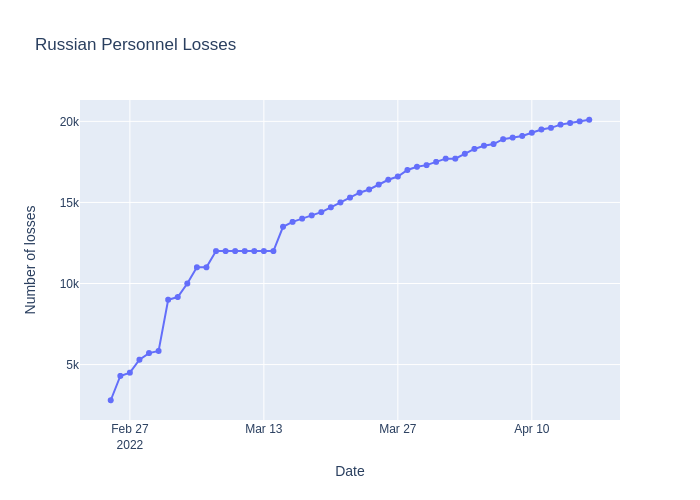

In [3]:
x, y = personnel_loss['date'], personnel_loss['personnel']

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers', name='lines+markers'))
fig.update_layout(title='Russian Personnel Losses',yaxis_title='Number of losses',
                 xaxis_title='Date')

fig.show("png")

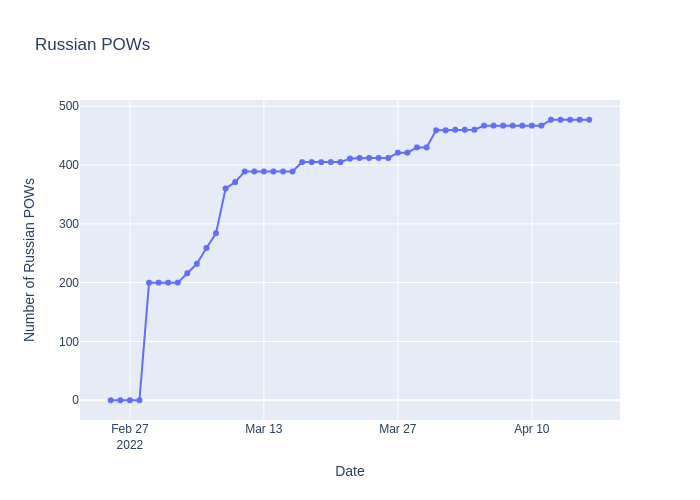

In [4]:
x, y = personnel_loss['date'], personnel_loss['POW']

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers', name='lines+markers'))
fig.update_layout(title='Russian POWs', yaxis_title='Number of Russian POWs', xaxis_title='Date')

fig.show("png")

### What were the bloodiest days for the Russian army in terms of personnel loss?

In [5]:
personnel_loss['Difference_Losses'] = personnel_loss['personnel'].diff() 

In [6]:
personnel_loss.iloc[0,5] = 2800

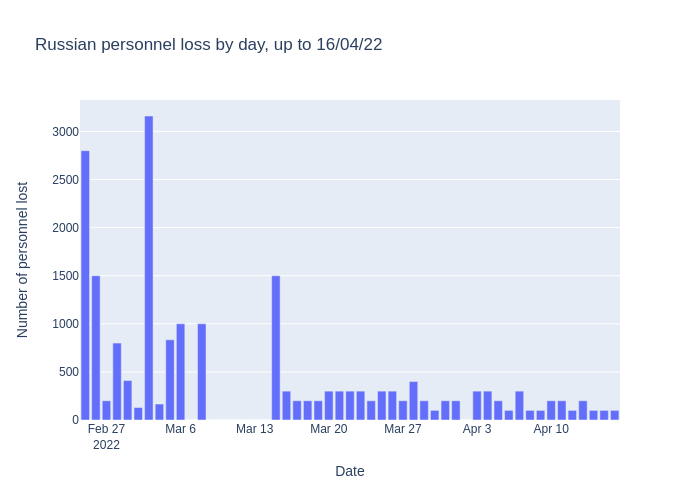

In [7]:
fig = px.bar(y=personnel_loss['Difference_Losses'], x=personnel_loss['date'],
            title='Russian personnel loss by day, up to 16/04/22')
fig.update_layout(xaxis_title='Date',yaxis_title='Number of personnel lost')
fig.update_traces(textfont_size=12, textangle=0, textposition='outside', cliponaxis=False)

fig.show("png")

### Top 10 worst days in the conflict

In [8]:
dfdf = personnel_loss[['date','Difference_Losses']]
dfdf.set_index('date',inplace=True)

In [9]:
ordered = dfdf['Difference_Losses'].sort_values(ascending=False)

In [10]:
top10 = dfdf['Difference_Losses'].nlargest(n=10)
topdates = ordered.index[0:10]

In [11]:
top10

date
2022-03-03    3160.0
2022-02-25    2800.0
2022-02-26    1500.0
2022-03-15    1500.0
2022-03-06    1000.0
2022-03-08    1000.0
2022-03-05     834.0
2022-02-28     800.0
2022-03-01     410.0
2022-03-28     400.0
Name: Difference_Losses, dtype: float64

In [12]:
topdates

Index(['2022-03-03', '2022-02-25', '2022-02-26', '2022-03-15', '2022-03-08',
       '2022-03-06', '2022-03-05', '2022-02-28', '2022-03-01', '2022-03-28'],
      dtype='object', name='date')

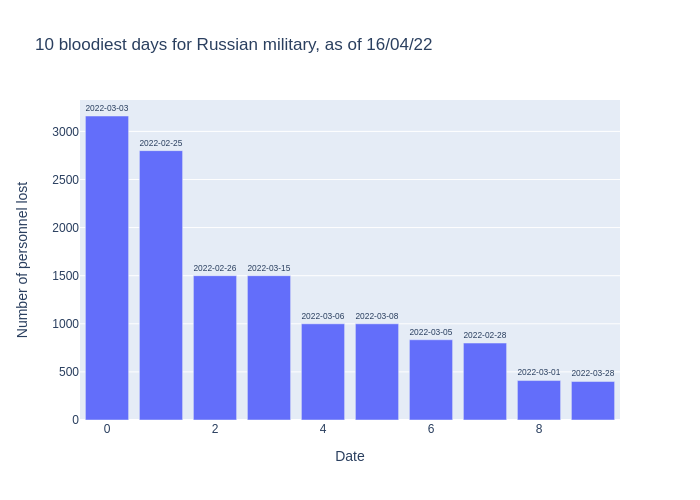

In [11]:
fig = px.bar(y=top10,text=top10.index,title='10 bloodiest days for Russian military, as of 16/04/22')
fig.update_layout(xaxis_title='Date',yaxis_title='Number of personnel lost')
fig.update_traces(textfont_size=12, textangle=0, textposition='outside', cliponaxis=False)

fig.show("png")

### On which days were most Russian soldiers taken prisoner?

In [12]:
personnel_loss['Difference_POW'] = personnel_loss['POW'].diff() 

In [13]:
personnel_loss.iloc[0,6] = 0

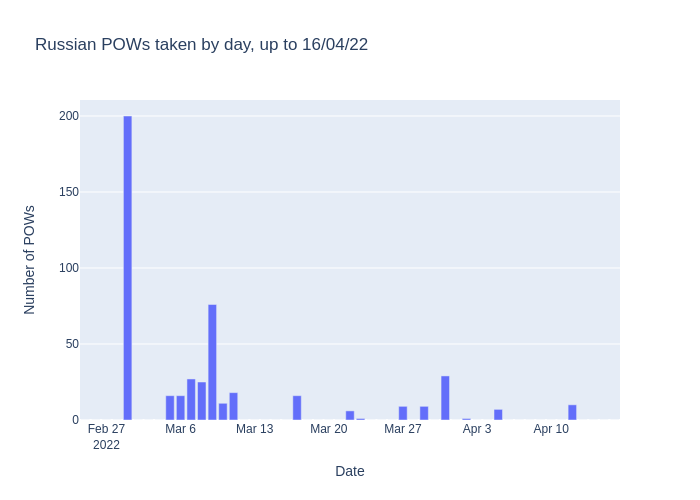

In [14]:
fig = px.bar(y=personnel_loss['Difference_POW'], x=personnel_loss['date'],
            title='Russian POWs taken by day, up to 16/04/22')
fig.update_layout(xaxis_title='Date',yaxis_title='Number of POWs')
fig.update_traces(textfont_size=12, textangle=0, textposition='outside', cliponaxis=False)

fig.show("png")

## Russian Equipment Loss

In [20]:
equipment_loss.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [21]:
equipment_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   51 non-null     object 
 1   day                    51 non-null     int64  
 2   aircraft               51 non-null     int64  
 3   helicopter             51 non-null     int64  
 4   tank                   51 non-null     int64  
 5   APC                    51 non-null     int64  
 6   field artillery        51 non-null     int64  
 7   MRL                    51 non-null     int64  
 8   military auto          51 non-null     int64  
 9   fuel tank              51 non-null     int64  
 10  drone                  51 non-null     int64  
 11  naval ship             51 non-null     int64  
 12  anti-aircraft warfare  51 non-null     int64  
 13  special equipment      32 non-null     float64
 14  mobile SRBM system     22 non-null     float64
dtypes: float

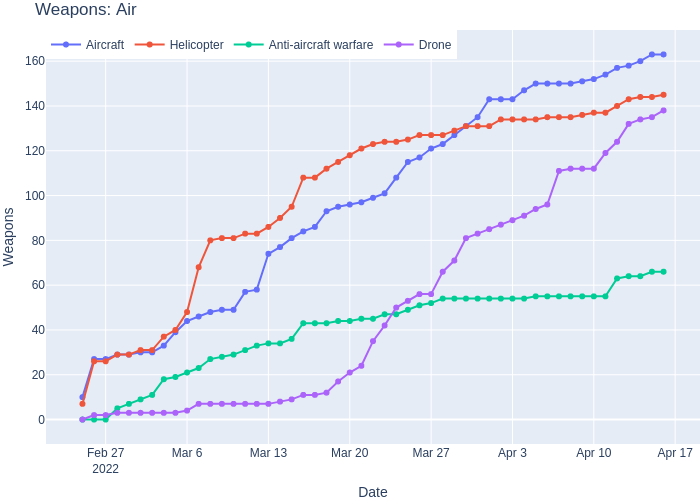

In [15]:
x = equipment_loss['date']
y0 = equipment_loss['aircraft']
y1 = equipment_loss['helicopter']
y2 = equipment_loss['anti-aircraft warfare']
y3 = equipment_loss['drone']

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y0, mode='lines+markers', name='Aircraft'))
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='Helicopter'))
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='Anti-aircraft warfare'))
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name='Drone'))
fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons: Air", xaxis_title="Date", yaxis_title="Weapons ",
                  margin=dict(l=0, r=0, t=30, b=0))

fig.show("png")

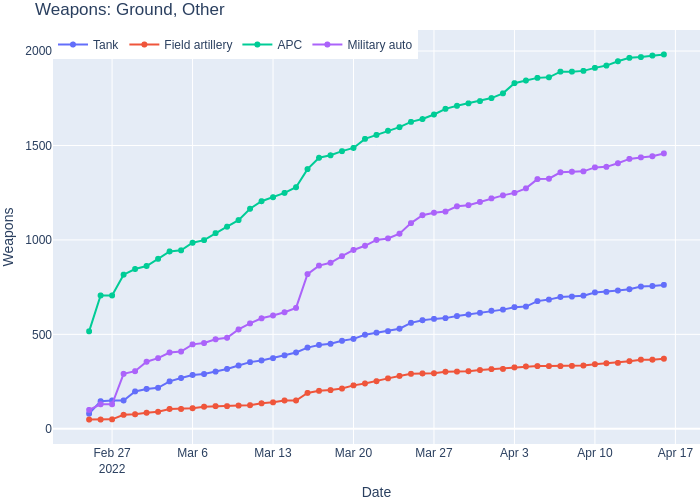

In [16]:
x = equipment_loss['date']
y0 = equipment_loss['tank']
y1 = equipment_loss['field artillery']
y2 = equipment_loss['APC']
y3 = equipment_loss['military auto']

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y0, mode='lines+markers', name='Tank'))
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='Field artillery'))
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='APC'))
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name='Military auto'))
fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons: Ground, Other", xaxis_title="Date", yaxis_title="Weapons ",
                  margin=dict(l=0, r=0, t=30, b=0))

fig.show("png")

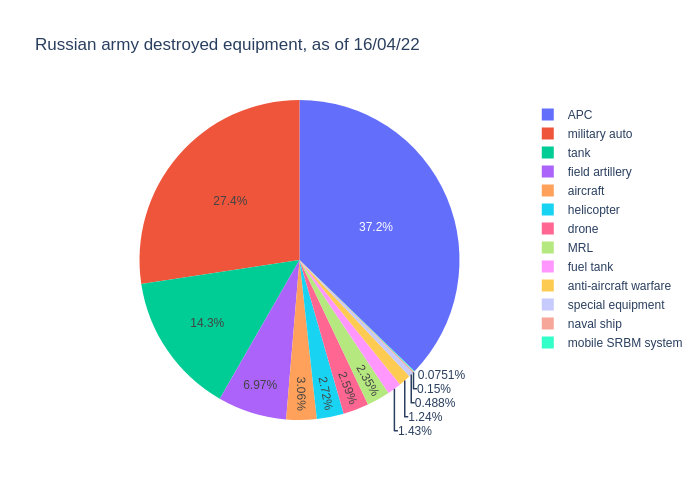

In [17]:
cols = equipment_loss.iloc[50:,[2,3,4,5,6,7,8,9,10,11,12,13,14]]

fig = px.pie(values=cols.loc[50], names=cols.columns, title='Russian army destroyed equipment, as of 16/04/22')

fig.show("png")

In [18]:
last_index = len(equipment_loss.index) - 1

In [19]:
latest_day_data = equipment_loss.iloc[-1:,2:].sort_values(by=[last_index],axis=1,ascending=False).T
latest_day_data.rename(columns= {last_index: 'unit_amount'}, inplace=True)

In [22]:
latest_day_data.head()

,unit_amount
APC,1982.0
military auto,1458.0
tank,762.0
field artillery,371.0
aircraft,163.0


In [20]:
losses_ranked_list = latest_day_data[latest_day_data.columns[0]].values.tolist()
equipment_ranked_list = latest_day_data.index.tolist()

In [21]:
air_units = ['helicopter', 'aircraft', 'drone']
naval_units = ['naval ship']
ground_units = ['APC', 'military auto', 'tank', 'field artillery', 'fuel tank', 'MRL','anti-aircraft warfare', 'special equipment', 'mobile SRBM system']
air_and_naval_units = ['helicopter', 'aircraft', 'drone', 'naval ship']

equipment_loss['Total Air Units'] = equipment_loss[air_units].sum(axis=1)
equipment_loss['Total Naval Units'] = equipment_loss[naval_units].sum(axis=1)
equipment_loss['Total Ground Units'] = equipment_loss[ground_units].sum(axis=1)

In [22]:
def impute_unit(unit_name):
    if unit_name in air_units:
        return "Air Units"
    elif unit_name in naval_units:
        return "Naval Units"
    else:
        return "Ground Units"

new_df = latest_day_data
new_df.reset_index(inplace=True)
new_df = new_df.rename(columns = {'index':'equipment_name'})

#performing data manipulation, imputing categorized unit type into a new column
new_df['unit_type'] = new_df['equipment_name'].apply(lambda x: impute_unit(x))
new_df.head()

,equipment_name,unit_amount,unit_type
0,APC,1982.0,Ground Units
1,military auto,1458.0,Ground Units
2,tank,762.0,Ground Units
3,field artillery,371.0,Ground Units
4,aircraft,163.0,Air Units


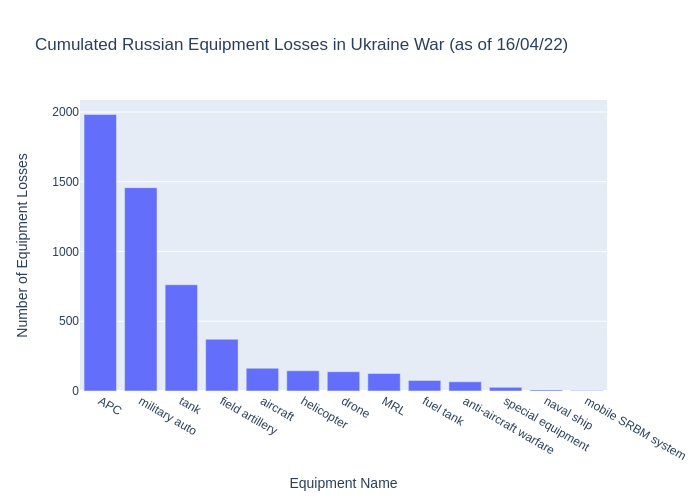

<Figure size 1008x864 with 0 Axes>

In [23]:
#Simple bar chart plot
plt.figure(figsize=(14,12))
fig = px.bar(new_df, x='equipment_name', y='unit_amount',
    title=f'Cumulated Russian Equipment Losses in Ukraine War (as of 16/04/22)')

fig.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
fig.update_layout(xaxis_title="Equipment Name",yaxis_title="Number of Equipment Losses")

fig.show("png")

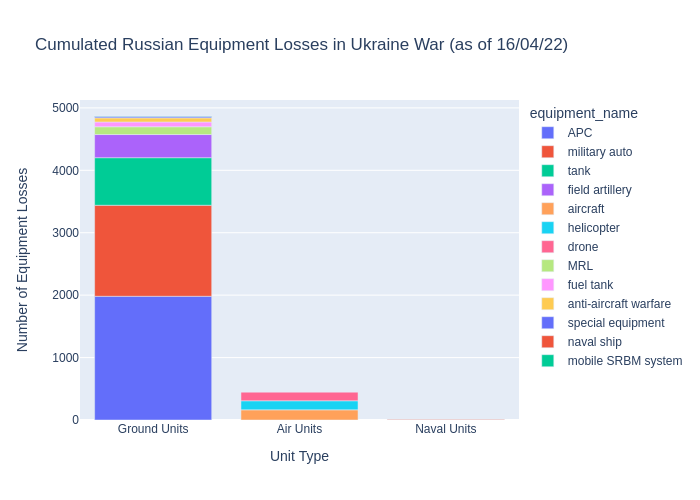

<Figure size 1008x720 with 0 Axes>

In [24]:
#Creating bar chart based on air, ground or naval unit type
plt.figure(figsize=(14,10))
fig = px.bar(new_df, x='unit_type', y='unit_amount', color='equipment_name',
    title=f'Cumulated Russian Equipment Losses in Ukraine War (as of 16/04/22)')

fig.update_layout(xaxis_title="Unit Type", yaxis_title="Number of Equipment Losses")

fig.show("png")

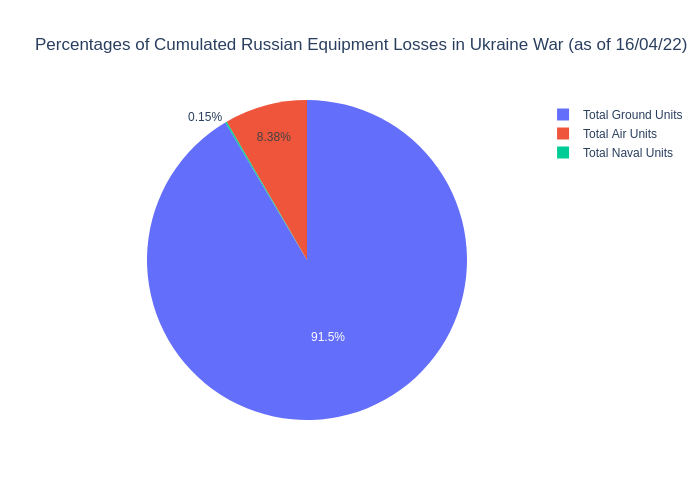

<Figure size 720x720 with 0 Axes>

In [25]:
#Creating pie chart containing percentages of equipment losses
plt.figure(figsize=(10,10))
categorized_df = equipment_loss.iloc[-1:,-3:].T

fig = px.pie(categorized_df, values=50, names=categorized_df.index, title=f'Percentages of Cumulated Russian Equipment Losses in Ukraine War\n(as of 16/04/22)')

fig.show("png")